<h1>DEMO Notebook</h1>
<h2>Using imexam in a Jupyter notebook with Ginga</h2>
<p align="left"> The Ginga HTML5 canvas viewer can be used as a viewer for the imexam package. While the Ginga viewer is active, you have access to all the imexam functions, as well as all the Ginga functions the HTML viewer provides. Some of the examples of Ginga functionality were taken directly from a Ginga demo notebook available on the Ginga github repository.</p>

<p align="left"> This and other demo notebooks can be found on the SpaceTelescope github site: https://github.com/spacetelescope/imexam/.</p>

<b>If you are running with Python 3, Ginga also requires that pillow be installed. If pillow is missing, you will see a blank viewer popup in the html window. You can "conda install pillow" and that should fix the problem.</b>


In [1]:
#This allows interactive plots to display inside of the notebook
%matplotlib notebook

In [2]:
import imexam

In [3]:
#Starts up a new tab with the Ginga HTML5 viewer
a=imexam.connect(viewer='ginga') 

<h3>The file of interest can be specified as resident in the current directory, via a relative path, or by a fully-qualified path.  In addition, you can obtain the image directly from MAST using the following commands: TBD.

In [4]:
#Display fits image in a separate browser window
a.load_fits('iabf03ieq_flt.fits') 

<h3>When using a Ginga window, the imexam() function is event driven. You <i>may need to double-click</i> on the Ginga window for your initial access to the Ginga functions as indicated by the crosshair cursor. The "i" and "q" keys toggle you into and out of access to the imexam functionality.  You will see messages on the Ginga display confirming your requested state.

<p>While in imexam mode, the analysis keys are mapped to the imexam functions and the results will be returned in the notebook</p></h3>

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel

Press the i key in the graphics window for access                  to imexam keys, or q to exit

read: l at 665.7033333333334, 804.1466666666668
Line at 665.7033333333334 804.1466666666668


<IPython.core.display.Javascript object>


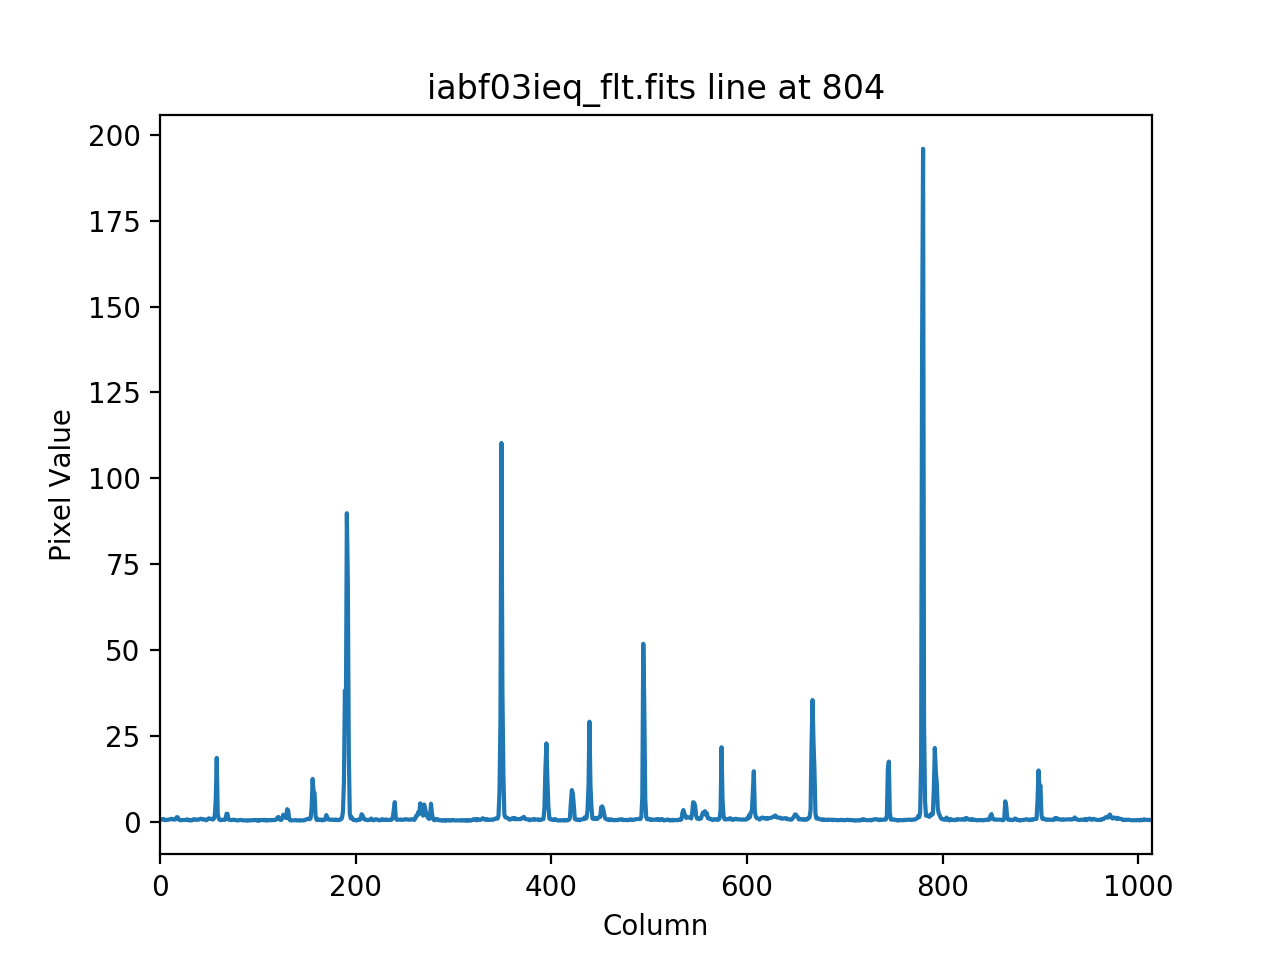

In [5]:
#The list of commands is NOT printed with the event driven imexam, but you can always 
#see what the available commands are by issuing the imexam() call:
a.imexam()

<h3><p align="left">The text printed above the plot: "read: e at x y" , means that the "e" key was pressed at those image coordinates. The "e" instructs imexam to make a contour plot.</p></h3>



In [ ]:
#All of the plots are customizable; the parameters are stored in regular dictionaries
a.eimexam()

In [ ]:
#Example of accessing the plot parameter dictionary directly for customization
a.set_plot_pars('e','title','My custom plot title')
a.set_plot_pars('e','floor',0.)
a.set_plot_pars('e','ncontours',4)

In [ ]:
#You can save a copy of the current viewing window
a.window.ginga_view.show()

<h3>Besides making plots, you can also get basic aperture photometry using the "a" key and radial plots with the "r" key. <i>Be aware your new plot may appear in your original graphics section of this notebook.</i></h3>

In [ ]:
#You can also request a numpy array of the data being viewed
data=a.get_data()

In [ ]:
#You can see some of the actual data values
data

In [ ]:
#You can look at the header as well
a.get_header()

<h3>If you are using the Ginga viewer, you can return the full Ginga image object and use any of the methods which are enabled for it. You can look here for the Ginga quick reference: 
http://ginga.readthedocs.org/en/latest/quickref.html</h3>

In [ ]:
img=a.get_image()

In [ ]:
type(img)

In [ ]:
img.height, img.width, img.pixtoradec(100,100)

In [ ]:
img.pixtoradec(100,100)

In [ ]:
canvas=a.window.ginga_view.add_canvas()
canvas.delete_all_objects()
canvas.set_drawtype('rectangle')

<h3>Go to the viewer and draw a rectangle selection region</h3>

In [ ]:
#Display the Ginga window with drawn rectangle 
ginga_view.show()

In [ ]:
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

#find all the peaks in the rectangle area
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)

In [ ]:
#Show the last 10 peaks detected in the cutout
peaks[:10] 

In [ ]:
objs = iq.evaluate_peaks(peaks, data)

In [ ]:
o1=objs[0]
o1

In [ ]:
#Pixel coords are for cutout, so add back in origin of cutout
#to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1+o1.objx, y1+o1.objy)

In [ ]:
#Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1+obj.objx, y1+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
a.window.ginga_view.set_pan((x1+x2)/2, (y1+y2)/2)
a.window.ginga_view.scale_to(0.75, 0.75)

In [ ]:
a.window.ginga_view.show()

In [ ]:
#For Ginga, there is not an automatic window close for the HTML5 canvas.
#Stop the http server
a.close()